# Regresion Lineal
Pensemos en un promebla simple. Queremos vender nuestra casa, pero no sabemos el precio. Entonces buscamos una base de datos con casas en la ciudad. Para el problema simple, solo vamos a usar tamanho de la casa.

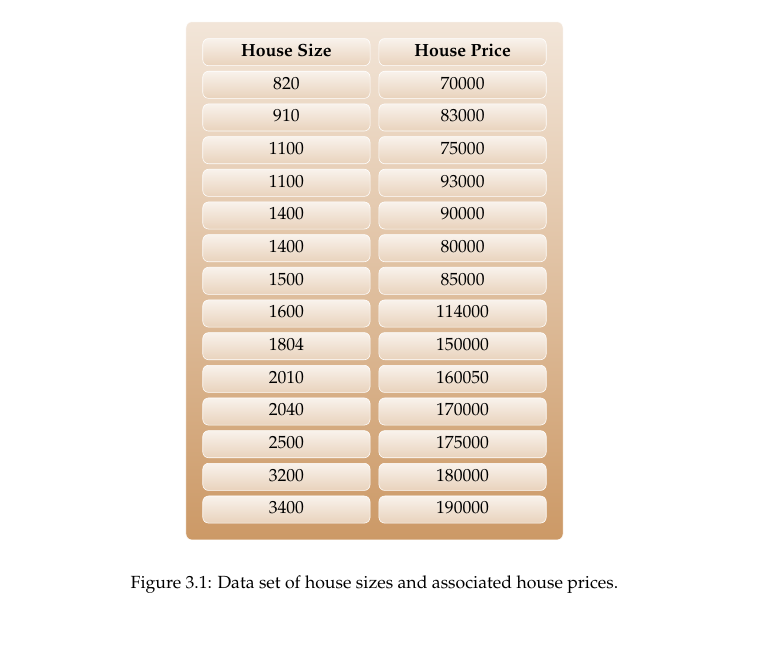

El problema lo vamos a plantear como un problema lineal

$$X \theta  = y .$$
Donde $X$ va a ser la matriz de datos, $\theta$ es nuestro vector de parametros, este es el que el sistema **aprende** y $y$ son los precios.


Pensemos que una casa de tamanbo $x_i$ tiene un precio de $y_i$.
El precio lo podemos ajustar a una linea de pendiente $\theta_1$
e interpecto $\theta_0$.
De igual forma, en general podemos escribir
$x_i$ tamanho, $y_i$ precio

$$y_1 = \theta_0 + \theta_1 x_1 .$$
$$y_2 = \theta_0 + \theta_1 x_2 .$$
$$y_3 = \theta_0 + \theta_1 x_3 .$$
$$ \vdots $$
$$y_m = \theta_0 + \theta_1 x_m .$$

Esto se puede escribir como


\begin{eqnarray}
\begin{pmatrix}
y_1 \\ y_2 \\ \vdots \\ y_n
\end{pmatrix}
=
\begin{pmatrix}
1 & x_1  \\
1 & x_2  \\
\vdots & \vdots \\
1 & x_m
\end{pmatrix}
\begin{pmatrix}
\theta_0 \\ \theta_1
\end{pmatrix}
\end{eqnarray}

En el ejemplo que tenemos en la grafica de arriba




$$\begin{pmatrix}
1 & 820  \\
1 & 910  \\
1 & 1100  \\
1 & 1100  \\
1 & 1400  \\
\vdots & \vdots \\
1 & 2500 \\
1 & 3200 \\
1 & 3400 \\
\end{pmatrix}
\begin{pmatrix} \theta_0 \\ \theta_1 \end{pmatrix}
= \begin{pmatrix}
70000 \\
83000 \\
75000 \\
93000 \\
90000 \\
\vdots \\
175000 \\
180000 \\
190000
\end{pmatrix} $$

Este problema es $X \theta = y$
donde

$$ X = \begin{pmatrix}
1 & 820  \\
1 & 910  \\
1 & 1100  \\
1 & 1100  \\
1 & 1400  \\
\vdots & \vdots \\
1 & 2500 \\
1 & 3200 \\
1 & 3400 \\
\end{pmatrix} \quad , \quad
y =  \begin{pmatrix}
70000 \\
83000 \\
75000 \\
93000 \\
90000 \\
\vdots \\
175000 \\
180000 \\
190000
\end{pmatrix} \quad , \quad \theta = \begin{pmatrix} \theta_0 \\ \theta_1 \end{pmatrix}
 $$

Asumamos que encontramos el $\theta$ optimo, entonces podemos usarlo para calcular el precio de nuestra casa.

$$ h(\theta, x_i) = x_i^T \theta =(1  \quad \text{precio})^T \theta $$

## re-visitamos el poblema de minimos cuadrados.

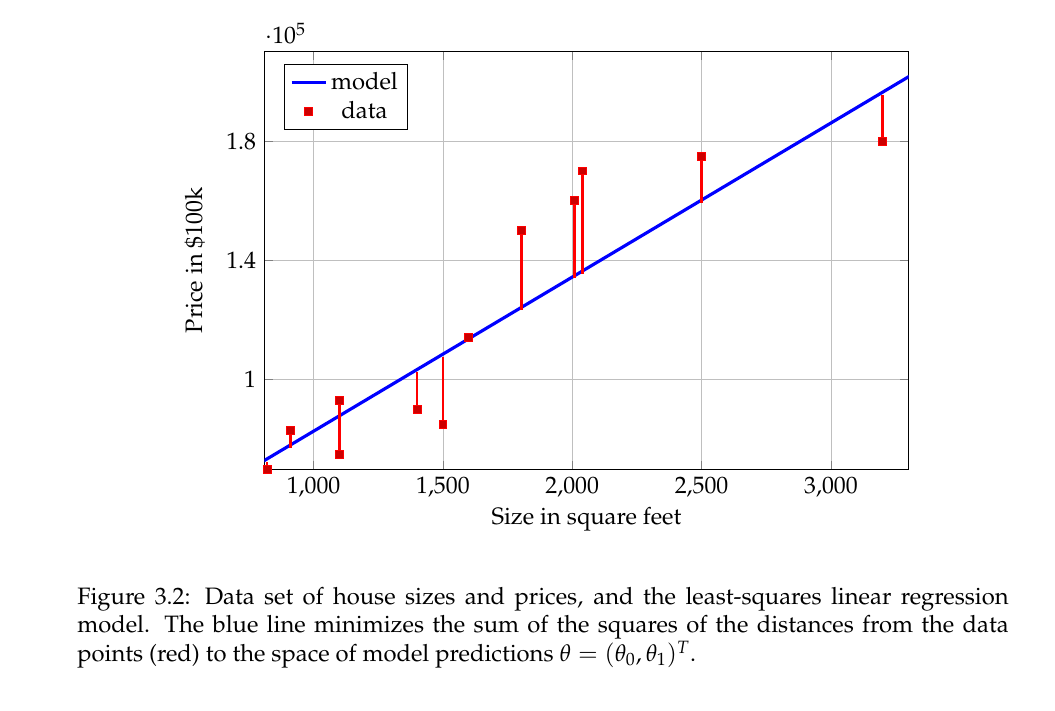

La ecuacion de la linea azul es $h(\theta, x) = \theta_0 + \theta_1 x$, a $h$ en ML se le llama **hipotesis**.
Una vez sepamos el area de nuestra casa, la insertamos en la ecuacion y ya tenemos el precio.

Queremos minimizar

$$C(\theta) = \sum_{i=1}^m (y_i - x_i^T \theta)^2 = \| X \theta - y \|^2 .$$
queremos minimizar $C(\theta)$.
La idea es tomar derivada (gradiente, con respecto a $\theta_0, \theta_1$) igularla a cero y encontramos las ecuacion normales.
Esto ya lo hicimos y produce las ecuaciones normales.


$$X^T X \theta = X^T y = b \tag{1} .$$
Para sistemas como el de arriba $X^T X$ siempre tiene inversa.

Yo normalmente desarrollo lo que viene en `Python` pero esta vez no por que eso va a ser pare de la proxima tarea.

$$X^T X = \begin{pmatrix} 14 & 24784 \\ 24784 & 52156616 \end{pmatrix} .$$
La inversa (usando `Python`)

$$ \begin{pmatrix} 4.49\times 10^{-1} & -2.1375\times 10^{-4} \\
-2.1375 \times 10^{-4} & 1.2075 \times 10^{-7} \end{pmatrix}  $$
Ahora

$$ b= X^T y = \binom{1.715 \times 10^6}{3.4642 \times 10^9} $$

La solucion (usando `Python`)
$$\theta = (X^T X)^{-1} X^T y .$$

$$ \theta_0 = 30994.74 \quad , \quad \theta_1=51.69 $$
`Python' tambien te da pseudoinversa







In [ ]:
import numpy as np
np.linalg.pinv(np.array([[14, 24784], [24784, 52156616]]))

array([[ 4.49835530e-01, -2.13754738e-04],
       [-2.13754738e-04,  1.20745898e-07]])

Que hace el que va a vender la casa con esta informacion

Calcula el precio con la hipotesis (el area de mi casa es 1000 pies cuadrados)

$$h(\theta, X) = (1 \quad x) \binom{\theta_0}{\theta_1} = \theta_0 + \theta_1 \times 1000 = 82,686 \text{   dolares} $$


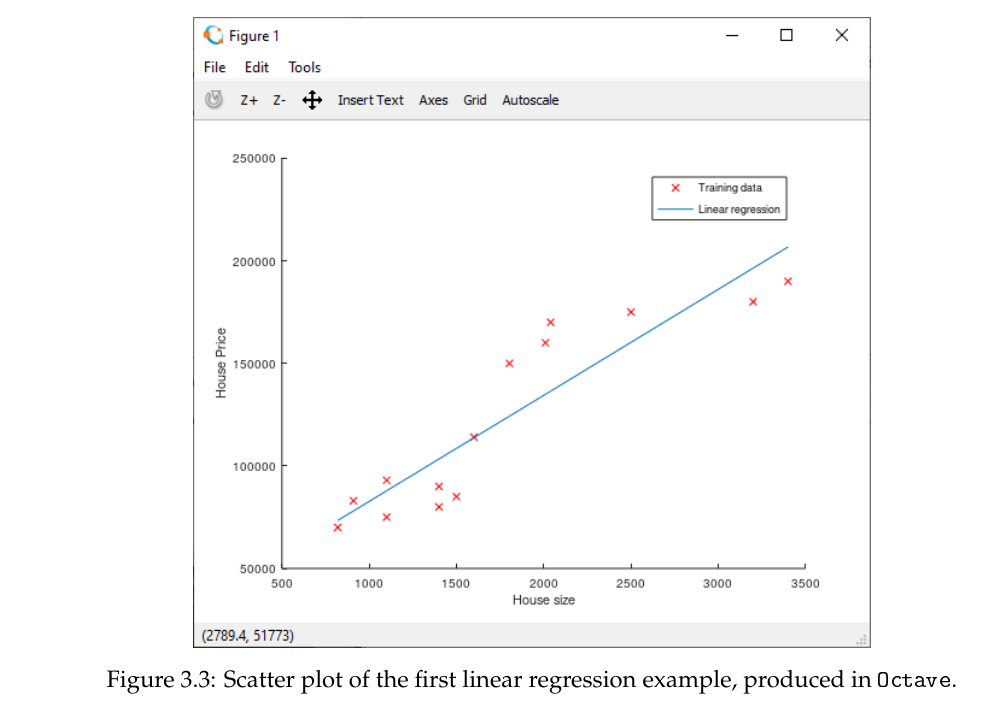

# Metodos de optimizacion usando el gradiente.
Las ecuaciones normales estan bien cuando el problema no tiene dimensiones muy grandes. Exigen muchas operaciones y se pierde precision. Los metodos basados en eliminacion gaussiana, inversa de la matriz, factorizacion LU, factorizaon QR, etc, son **muy costosos** Existen metodos rapidos para solucionar problemas de este tipo.

## Metodos de solucion del problema $A \theta = b$

1. Metodos estacionarios
El gradiente no cambia, se tiene una matriz fija, la
matriz se piensa como $A=L + D +U$ y se mueven algunos
terminos para la derecha formando un problema de **punto fijo**.
Esto genera metodos como
    1. Jacobi
    2. Gauss-Seidel
    3. SOR: Successive Over-relaxation
2. Metodos noestacionarios: Estos son los que se usan mas en ML.
    1. Steepest Descent (maximo descenso SD)
    2. Conjugate Gradient (Gradiente conjugado)
    3. Metodos de Newton L-BFGS.

Hay muchos mas metodos para resolver problemas lineales o no.    

**Nota**:  Resolver $ax=b$ es lo mismo que encontra el
minimo de $f(x) = \frac12 a x^2 - bx + c$,
$f'(x) = ax - b= 0$, $ax=b$.
En matrices
$$f(x) = \frac12 x^T A x - x^T b + c $$
aca encuentra que
$$ \nabla f(x)  = A x -b$$, de forma que $\nabla f(x) = 0$
implica $Ax = b$.


* Simulating annealing: Es bueno para encontrar el minimo global.
pero no usa gradientes y es lento

* Pattern Search (busqueda de patrones).

* Metodos de Newton. Se basan en expansiones de Taylor y usan hasta la matriz Hessian. Son costos. No son practicos para ANN

* Quasi-Newton: Estos practicos. En vez de la matriz Hessiana buscan una aproximacion a una diagonal. Aca esta un ejemplo
L-BFGS: Limited Memory Broyden, Fletcher, Goldfarb, y Shanno.

* Metodos evolutivos inspirados en la biologia. Por ejemplo
    * [particle swarm optimization](https://en.wikipedia.org/wiki/Particle_swarm_optimization).

    * genetic algorithms (algoritmos geneticos)

* Metodos de descenso con gradiente:
    * Steepest Descent (SD). Es analitico para funciones cuadraticas.
    * Conjugate Gradient (CG) (gradiente conjugado). Es muy preciso y converge en $n$ iteraciones para un modelo de $n$ dimensiones. Es mucho mas rapido y preciso que el anterior. Los anteriores son para modelos lineales.
    * Nonlinear conjugate gradient( gradiente conjugado no lineal). Aca cae el L-BFGS.
    * SGD: Stochastic Gradient Descent.



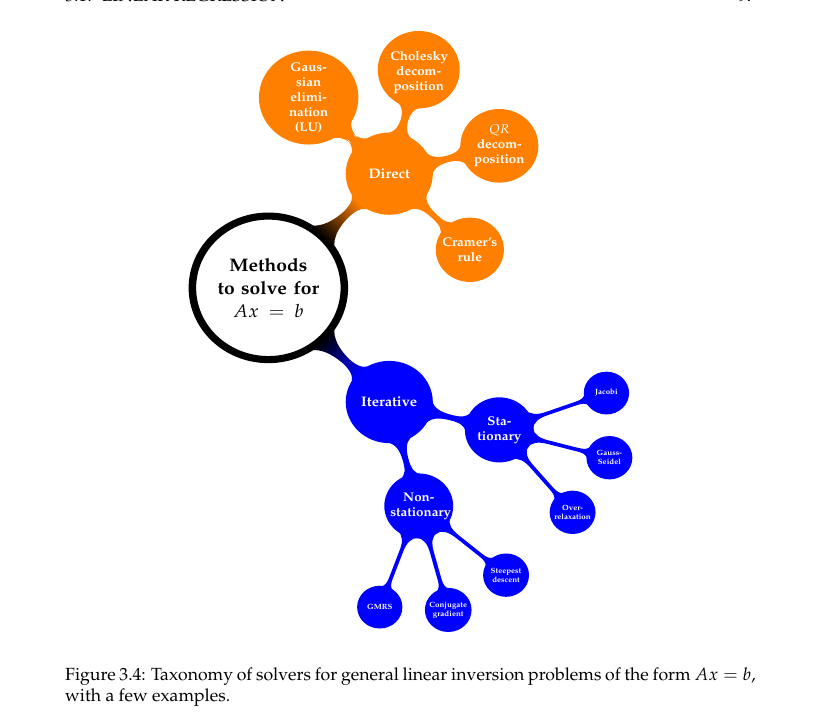

Todos los problemas que vamos a tratar en este curso (casi todos los ML) son problemas de optimizacion. En estos problemas se define una funcion de costo/objetivo ($J, C)$, y se minimiza.
En el caso del problema que estasmos estudiando


$$ J = \frac12  \| X \theta - y \|^2 = \frac12 \| h(\theta,x) - y \|^2 = \frac12 \sum_{i=1}^m ( h(\theta, x^{(i)}) - y_i)^2 .$$

Queremos minimizar $J$ tomamos la derivada parcial y la igualamos a cero.


$$\frac{\partial J}{\partial \theta_k} = \sum_{i=1}^m (h(\theta, x^{(i)}) - y_i) x_{ik}  .$$

Veamos lo de $x_{ik}$

$$(X \theta)_{i} =\sum_{l=1}^n x_{il} \theta_l.$$
$$\frac{\partial}{\partial  \theta_k} (X \theta)_{i} =\sum_{l=1}^n x_{il} \frac{\partial \theta_l}{\partial \theta_k}=
\sum_{l=1}^n x_{il} \delta_{lk} = x_{ik}.$$

## Steepest Descent: Maximo descenso.
Cual es la direccion de maximo descenso?
Recordemos del la derivada direccional

$$ \frac{\partial J}{\partial u} = \nabla J \cdot u \tag{2} $$

Cual la direccion de maximo incremento. Recuerden

$$ u \cdot v = \| u \| \| v \| \cos \theta $$
En el caso de la ecuacion (2) el maximo valor es
cuando $\cos \theta = 1$. Es cuando $u$ esta en la direccion de $\nabla J$. Y la maxima derivada esta en la direccion (ascenso)

$$ u = \frac{\nabla J(\theta)}{\| \nabla J(\theta) \|} $$
Como lo que queremos es bajar, entonces pensamos en


$$ u = -\frac{\nabla J(\theta)}{\| \nabla J(\theta) \|} $$

El descenso por gradiente se da con la siguiente iteracion


$$\theta^{(i+1)} \approx \theta^{(i)} - \alpha \nabla_{\theta} J(\theta^{(i)}) .$$




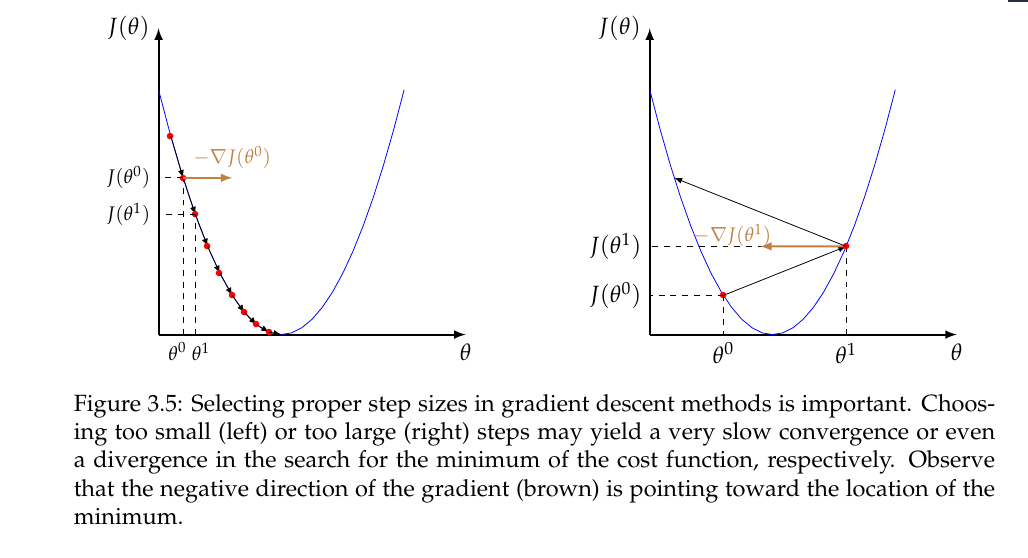

El parametro $\alpha$ se llama **learning parameter** (parametro de aprendizaje) es importante por la grafica que acabo de ilustrar.

* Si es muy pequenho la convergencia puede ser muy lenta
* Si es muy grande, puede diverger, en vez de converger.

